<a href="https://colab.research.google.com/github/juliotorresma/Curso_MachineLearning/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresion Lineal**

In [154]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## **Modelar nuestros datos de entrada**

In [155]:
X = np.arange(-10,11,1)
Y = 10 * X + np.random.normal(loc=0,scale=20.0,size=len(X))

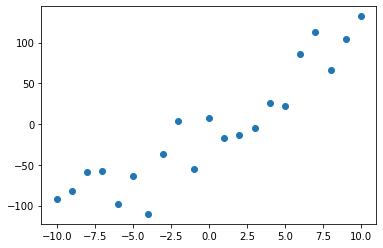

In [156]:
plt.figure()
plt.scatter(X,Y)
plt.show()

# **Creamos modelo de Regresion Lineal con Sklearn**

In [157]:
#Para que Sklearn no de error con mi variable array, tengo que convertir mi variable a matriz
XX = np.reshape(X,( len(X) , 1  ))

In [158]:
model = LinearRegression()
model.fit(XX,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
print(model.coef_)
print(model.intercept_)

[10.77178273]
-6.127661418178793


# **Entrenar con Dataset del Vino**

In [160]:
df = pandas.read_csv('/content/drive/MyDrive/Dataset Curso Machine Learning/winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## **Tenemos que separar los datos en datos de entrenamiento y datos de prueba/testeo**


In [161]:
#              filas         columnas
X = df.values[:,:-1]
Y = df.values[:,-1]

X_train, X_test, y_train, y_test  = train_test_split(X , Y, test_size=0.30, random_state = 42)


model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
print(model.coef_)
print(model.intercept_)

[ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]
17.96257833923447


# **Testeamos nuestro modelo y vemos sus predicciones**

In [163]:
predict = model.predict(X_test)
print("MSE:",mean_absolute_error(y_test,predict))

MSE: 0.5133956082451127


# **Modelo Cuádratico**

In [164]:
X = np.random.uniform(low=-10,high=10, size=100)
Y = (30 * (X**2)) + (10 * X) + np.random.normal(loc = 0,scale =500, size = len(X))

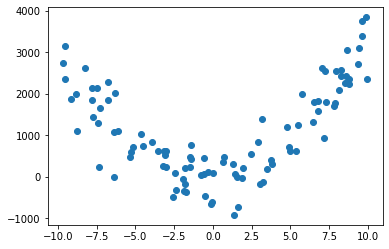

In [165]:
plt.figure()
plt.scatter(X,Y)
plt.show()

In [166]:
XX = np.reshape(X, (len(X),1))

In [167]:
XX2 = np.concatenate((XX,XX**2,XX**3),axis=1)

In [168]:
model = LinearRegression()
model.fit(XX2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
print(model.coef_)
print(model.intercept_)

[ 9.40538354 31.09881364  0.24205018]
9.964759520236385


# **Regresion no lineal para Dataset de Vino**

In [170]:
X_vino = df.values[:,:-1]
Y_vino = df.values[:,-1]

X_train, X_test, y_train, y_test  = train_test_split(X_vino , Y_vino, test_size=0.30, random_state = 42)

In [171]:
#Matriz con valores al cuadrado de mis input
X_train2 = np.concatenate((X_train,X_train**2),axis=1)

In [172]:
model = LinearRegression()
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
X_test = np.concatenate((X_test,X_test**2),axis=1)
prediccion = model.predict(X_test)

In [174]:
print("MSE:",mean_absolute_error(y_test,prediccion))

MSE: 0.5108017867111186
